In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
def divide_by_city(df,city_name):
    df2=df[df['city']==city_name]
    return df2

# Calendar Exploration

### cleaning the data

In [3]:
pd.read_csv('austin_listings.csv.gz')

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,880571,...,4.94,4.75,4.78,NaN,t,5,2,3,0,4.36
1,5456,https://www.airbnb.com/rooms/5456,20221215043825,2022-12-15,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.74,4.79,NaN,f,1,1,0,0,3.71
2,331549,https://www.airbnb.com/rooms/331549,20221215043825,2022-12-15,previous scrape,One Room with Private Bathroom,<b>The space</b><br />One bedroom with private...,NaN,https://a0.muscache.com/pictures/9486602/d002b...,1690383,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,5769,https://www.airbnb.com/rooms/5769,20221215043825,2022-12-15,city scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.75,4.92,NaN,f,1,0,1,0,1.77
4,333442,https://www.airbnb.com/rooms/333442,20221215043825,2022-12-15,city scrape,Rare Secluded 1940s Estate,Welcome to our RARE SECLUDED 1940s ESTATE--an ...,Tarrytown is one of the oldest and most distin...,https://a0.muscache.com/pictures/457912c4-dd6e...,1698318,...,4.97,4.91,4.78,NaN,t,1,1,0,0,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13803,775205162431032890,https://www.airbnb.com/rooms/775205162431032890,20221215043825,2022-12-15,city scrape,"Downtown Austin Pied de Terre, cute studio!",Enjoy the flavor of Old Austin in our lovingly...,The neighborhood is in the downtown with easy ...,https://a0.muscache.com/pictures/f612be64-8164...,95139463,...,NaN,NaN,NaN,NaN,f,15,15,0,0,NaN
13804,775306960895705604,https://www.airbnb.com/rooms/775306960895705604,20221215043825,2022-12-15,city scrape,Bedroom W/ Shared Bathroom,My name is Maris and I am renting out my secon...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,286256623,...,NaN,NaN,NaN,NaN,t,4,2,2,0,NaN
13805,775358125921423628,https://www.airbnb.com/rooms/775358125921423628,20221215043825,2022-12-15,city scrape,Creek Zen,"This is a peaceful, quiet and centrally-locate...",I live in a quiet neighborhood. Many of my nei...,https://a0.muscache.com/pictures/miso/Hosting-...,490347286,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.00
13806,775373038956495432,https://www.airbnb.com/rooms/775373038956495432,20221215043825,2022-12-15,city scrape,The Flamingo - 1/1 pink retreat,Welcome to Austin and welcome to the Flamingo!...,We are located near Airport (rd) and 51st. <br...,https://a0.muscache.com/pictures/miso/Hosting-...,203862347,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


In [3]:
calendar_df=pd.read_csv('calendar.csv')

In [4]:
calendar_df.shape

(12412230, 10)

In [5]:
calendar_df

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city,state
0,0,5456,2022-12-15,t,$95.00,$95.00,2.0,90.0,Austin,Texas
1,1,5456,2022-12-16,t,$115.00,$115.00,2.0,90.0,Austin,Texas
2,2,5456,2022-12-17,t,$115.00,$115.00,2.0,90.0,Austin,Texas
3,3,5456,2022-12-18,t,$95.00,$95.00,2.0,90.0,Austin,Texas
4,4,5456,2022-12-19,t,$85.00,$85.00,2.0,90.0,Austin,Texas
...,...,...,...,...,...,...,...,...,...,...
12412225,2965648,32495864,2023-12-16,f,$165.00,$165.00,4.0,1125.0,Nashville,Tennessee
12412226,2965649,32495864,2023-12-17,f,$165.00,$165.00,4.0,1125.0,Nashville,Tennessee
12412227,2965650,32495864,2023-12-18,f,$165.00,$165.00,4.0,1125.0,Nashville,Tennessee
12412228,2965651,32495864,2023-12-19,f,$165.00,$165.00,4.0,1125.0,Nashville,Tennessee


In [6]:
calendar_df.columns

Index(['Unnamed: 0', 'listing_id', 'date', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'city', 'state'],
      dtype='object')

In [7]:
#change data type of the datetime field and the price fields
calendar_df['date']=pd.to_datetime(calendar_df['date'])

In [8]:
calendar_df['price']=calendar_df['price'].replace('[\$,]','',regex=True).astype(float)
calendar_df['adjusted_price']=calendar_df['adjusted_price'].replace('[\$,]','',regex=True).astype(float)

In [9]:
#looking for null values
null_counts = calendar_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

price             742
adjusted_price    742
minimum_nights     18
maximum_nights     18
dtype: int64

In [10]:
calendar_df=calendar_df.dropna()
calendar_df.shape

(12411470, 10)

In [11]:
calendar_df=calendar_df.drop_duplicates()
calendar_df.shape
#no duplicates in the dataframe

(12411470, 10)

### splitting by city

In [12]:
cal_austin_df=divide_by_city(calendar_df,'Austin')
cal_portland_df=divide_by_city(calendar_df,'Portland')
cal_nash_df=divide_by_city(calendar_df,'Nashville')
cal_chicago_df=divide_by_city(calendar_df,'Chicago')

In [13]:
print('Austin: ',cal_austin_df.shape, '%',np.round(cal_austin_df.shape[0]/calendar_df.shape[0],2)*100)
print('Portland: ',cal_portland_df.shape, '%',np.round(cal_portland_df.shape[0]/calendar_df.shape[0],2)*100)
print('Nashville: ',cal_nash_df.shape, '%',np.round(cal_nash_df.shape[0]/calendar_df.shape[0],2)*100)
print('Chicago: ',cal_chicago_df.shape, '%',np.round(cal_chicago_df.shape[0]/calendar_df.shape[0],2)*100)

Austin:  (5039173, 10) % 41.0
Portland:  (1623885, 10) % 13.0
Nashville:  (2965287, 10) % 24.0
Chicago:  (2783125, 10) % 22.0


### Maximum Nights

What is the minimum, average, and maximum number of max nights?

In [14]:
print('min nights: ',min(calendar_df['maximum_nights']))
print('avg nights: ',np.mean(calendar_df['maximum_nights']))
print('max nights: ',max(calendar_df['maximum_nights']))

min nights:  1.0
avg nights:  3128706.81266095
max nights:  2147483647.0


<AxesSubplot:xlabel='maximum_nights', ylabel='Count'>

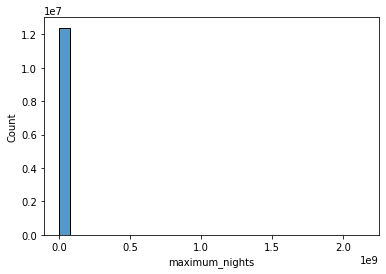

In [15]:
sns.histplot(data=calendar_df, x="maximum_nights",bins=30)

taking the logarithm to better compare

<AxesSubplot:>

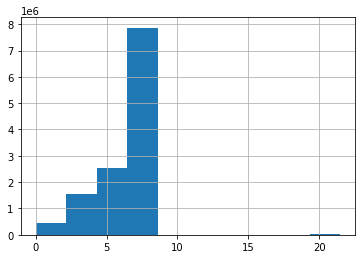

In [16]:
calendar_df["maximum_nights"].apply(np.log).hist()

In [17]:
#Is there a default setting value for maximum nights someone can stay?

comparing different cities distribution

<AxesSubplot:>

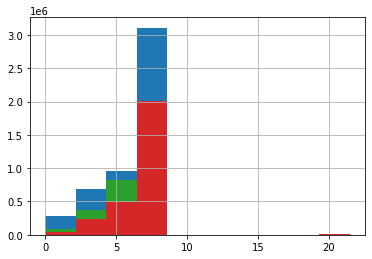

In [18]:
cal_austin_df["maximum_nights"].apply(np.log).hist()
cal_portland_df["maximum_nights"].apply(np.log).hist()
cal_nash_df["maximum_nights"].apply(np.log).hist()
cal_chicago_df["maximum_nights"].apply(np.log).hist()

### Minimum Nights

What is the minimum, average, median, and maximum number of min nights?

In [19]:
print('min nights: ',min(calendar_df['minimum_nights']))
print('avg nights: ',np.mean(calendar_df['minimum_nights']))
print('max nights: ',max(calendar_df['minimum_nights']))

min nights:  1.0
avg nights:  16.780995724116483
max nights:  1125.0


<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

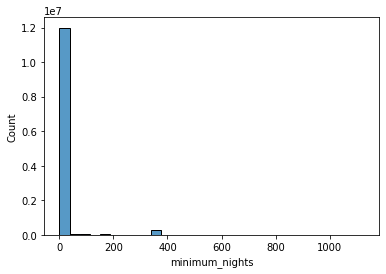

In [20]:
sns.histplot(data=calendar_df, x="minimum_nights",bins=30)

<AxesSubplot:>

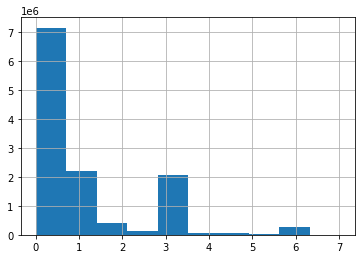

In [21]:
#taking the logarithm to better compare
calendar_df["minimum_nights"].apply(np.log).hist()

comparing different cities distribution

<AxesSubplot:>

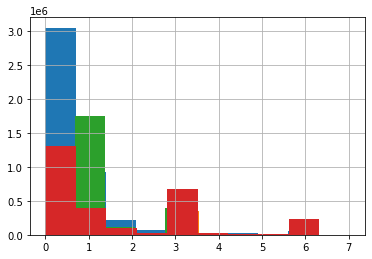

In [22]:
cal_austin_df["minimum_nights"].apply(np.log).hist()
cal_portland_df["minimum_nights"].apply(np.log).hist()
cal_nash_df["minimum_nights"].apply(np.log).hist()
cal_chicago_df["minimum_nights"].apply(np.log).hist()

In [23]:
calendar_df['count']=1
min_df=calendar_df[['city','minimum_nights','count']].groupby(['city','minimum_nights']).count().reset_index()

In [24]:
min_df_30=min_df[min_df['minimum_nights']<=30]

[Text(0.5, 1.0, 'Minimum Nights Under 30 Count of Rentals')]

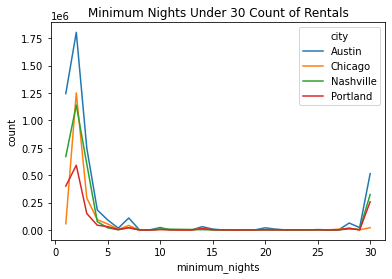

In [25]:
sns.lineplot(data=min_df_30,x='minimum_nights',y='count',hue='city').set(title='Minimum Nights Under 30 Count of Rentals')

[Text(0.5, 1.0, 'Minimum Nights Over 30 Count of Rentals')]

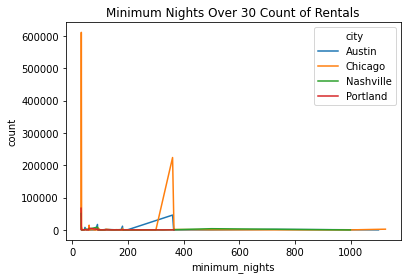

In [26]:
min_df_over30=min_df[min_df['minimum_nights']>30]
sns.lineplot(data=min_df_over30,x='minimum_nights',y='count',hue='city').set(title='Minimum Nights Over 30 Count of Rentals')

In [27]:
#why do Chicago and Austin have a peak at around 365 for rental minimums?
#what does available mean exactly? is it based on whether they have the rental space open??

### Price

In [28]:
max(calendar_df['price'])

100000.0

In [29]:
min(calendar_df['price'])

0.0

In [30]:
np.mean(calendar_df['price'])

294.27204126505563

In [31]:
price_zero_df=calendar_df[calendar_df['price']==0]
price_zero_lst=list(price_zero_df['listing_id'].unique())

In [32]:
for id_ in price_zero_lst:
    values=calendar_df[calendar_df['listing_id']==id_]['price'].unique()
    print(id_,values)

42738847 [0.]
41740623 [0.]
43078540 [0.]


In [33]:
#why where there listings that cost $0??

In [34]:
calendar_df[calendar_df['price']<=15]

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city,state,count
639116,639116,19840835,2022-12-16,f,5.0,5.0,1.0,1.0,Austin,Texas,1
639117,639117,19840835,2022-12-17,f,5.0,5.0,1.0,1.0,Austin,Texas,1
639118,639118,19840835,2022-12-18,f,5.0,5.0,1.0,1.0,Austin,Texas,1
639119,639119,19840835,2022-12-19,f,5.0,5.0,1.0,1.0,Austin,Texas,1
639120,639120,19840835,2022-12-20,f,5.0,5.0,1.0,1.0,Austin,Texas,1
...,...,...,...,...,...,...,...,...,...,...,...
12301265,2854688,27633928,2023-12-17,f,10.0,10.0,1.0,1125.0,Nashville,Tennessee,1
12301266,2854689,27633928,2023-12-18,f,10.0,10.0,1.0,1125.0,Nashville,Tennessee,1
12301267,2854690,27633928,2023-12-19,f,10.0,10.0,1.0,1125.0,Nashville,Tennessee,1
12301268,2854691,27633928,2023-12-20,f,10.0,10.0,1.0,1125.0,Nashville,Tennessee,1


<AxesSubplot:>

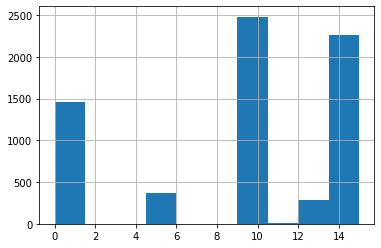

In [35]:
price_to_15=calendar_df[(calendar_df['price']<=15)]
price_to_15['price'].hist()

<AxesSubplot:>

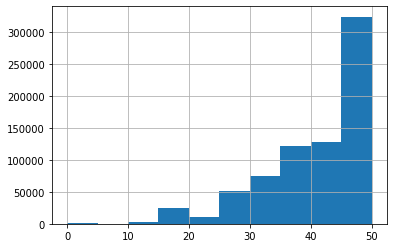

In [36]:
price_to_50=calendar_df[(calendar_df['price']<=50)]
price_to_50['price'].hist()

In [37]:
#Do these prices change the longer your stay is with them? It becomes a discount rate??

<AxesSubplot:>

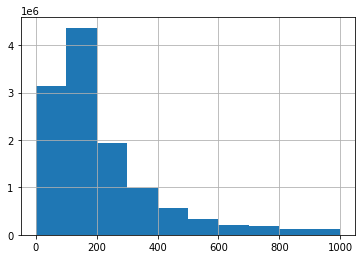

In [38]:
price_to_1000=calendar_df[(calendar_df['price']<=1000)]
price_to_1000['price'].hist()

In [39]:
#what is the average number of maximum nights depending on the minimum night?
#are there different average min/max nights depending on the city we are analyzing?
#what time frame is the data from?
#what are the distributions of price vs adjusted price?
#how many are available and not available?
#how many unique listing IDs are there?
#are prices more expensive on the weekends?
#are prices more expensive depending on the time of month
#are prices more expensive on holidays?
#does the price change depending on the minimum number or maximum of nights?
#is minimum and maximum nights the same and depends on the listing number?

### Time

In [40]:
calendar_df['weekday_num'] = calendar_df['date'].dt.dayofweek

conditions = [(calendar_df['weekday_num'] ==0),
    (calendar_df['weekday_num'] == 1),
    (calendar_df['weekday_num'] == 2),
    (calendar_df['weekday_num'] == 3),
    (calendar_df['weekday_num'] == 4),
    (calendar_df['weekday_num'] == 5),
    (calendar_df['weekday_num'] == 6)]

values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

calendar_df['weekday']= np.select(conditions, values)

[Text(0.5, 1.0, 'Average Airbnb Rental Price by Weekday')]

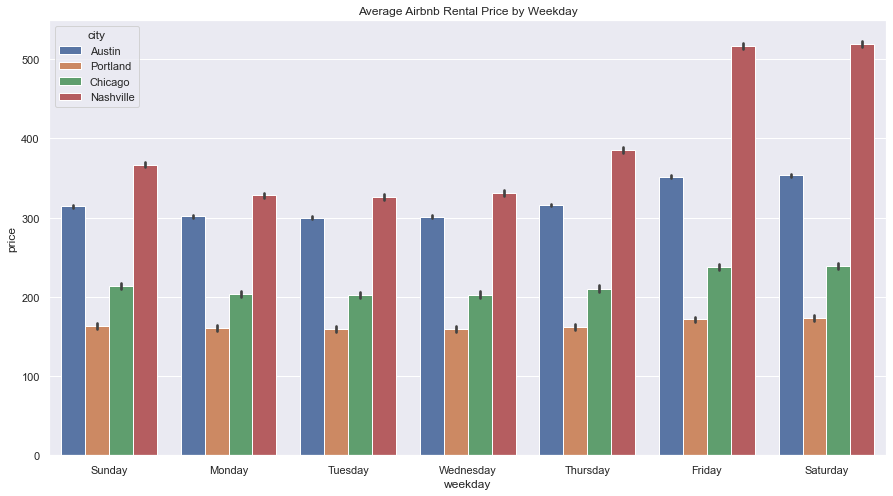

In [41]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=calendar_df,x='weekday',y='price',hue='city',order=['Sunday','Monday','Tuesday','Wednesday',
                                                                     'Thursday','Friday','Saturday']).set(
    title='Average Airbnb Rental Price by Weekday')

[Text(0.5, 1.0, 'Average Airbnb Rental Price by Month and Year')]

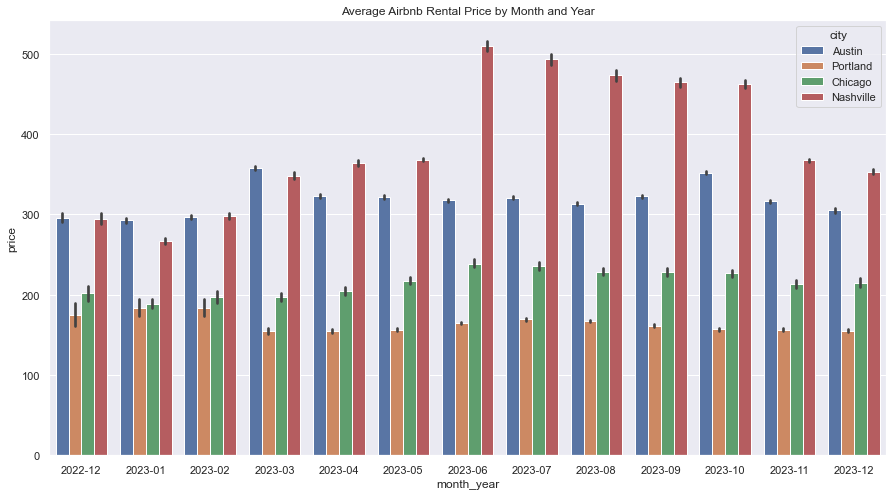

In [42]:
calendar_df['month_year']=calendar_df['date'].dt.to_period('M')
sns.barplot(data=calendar_df,x='month_year',y='price',hue='city').set(
    title='Average Airbnb Rental Price by Month and Year')

### Listing ID

In [43]:
print('number of unique listing IDs: ',len(list(calendar_df['listing_id'].unique())))

number of unique listing IDs:  34007


In [44]:
min_value=calendar_df[['listing_id','price']].groupby('listing_id').min().reset_index()
max_value=calendar_df[['listing_id','price']].groupby('listing_id').max().reset_index()
min_max_value=min_value.merge(max_value,on='listing_id')
min_max_value['difference']=min_max_value['price_y']-min_max_value['price_x']
min_max_value=min_max_value[min_max_value['difference']!=0]

In [45]:
print('mean: ',np.mean(min_max_value['difference']))
print('median: ',np.median(min_max_value['difference']))
print('min: ',min(min_max_value['difference']))
print('max: ',max(min_max_value['difference']))

#shows that this data is highly right skewed

mean:  504.3395158514666
median:  136.0
min:  1.0
max:  99670.0


In [46]:
#why do some airbnb's have price differences that are over 10,000 from max and min?
min_max_value[min_max_value['difference']>10000]

,listing_id,price_x,price_y,difference
578,1283113,800.0,16000.0,15200.0
2312,6700201,80.0,80125.0,80045.0
3101,9731339,73.0,10399.0,10326.0
3433,11167415,89.0,98115.0,98026.0
4030,13097045,86.0,95102.0,95016.0
...,...,...,...,...
31320,730572750735489753,78.0,20998.0,20920.0
31721,737817790238932864,78.0,20998.0,20920.0
32232,747007991449261753,260.0,10400.0,10140.0
33150,764593141171260084,1140.0,12297.0,11157.0


[Text(0.5, 1.0, 'Log Distribution of Difference in Prices Based on Listing ID')]

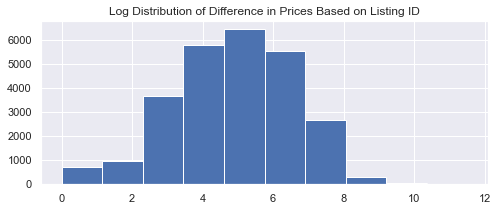

In [47]:
sns.set(rc={'figure.figsize':(8,3)})
min_max_value['difference'].apply(np.log).hist().set(title='Log Distribution of Difference in Prices Based on Listing ID')

### Available vs Not Available

In [48]:
calendar_df.columns

Index(['Unnamed: 0', 'listing_id', 'date', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'city', 'state',
       'count', 'weekday_num', 'weekday', 'month_year'],
      dtype='object')

[Text(0.5, 1.0, 'Available vs. Not Available Listings')]

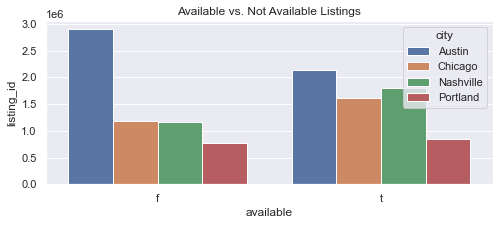

In [49]:
available_df=calendar_df[['available','listing_id','city']].groupby(['available','city']).count().reset_index()
sns.barplot(data=available_df,x='available',y='listing_id',hue='city').set(title='Available vs. Not Available Listings')

<AxesSubplot:xlabel='weekday', ylabel='count'>

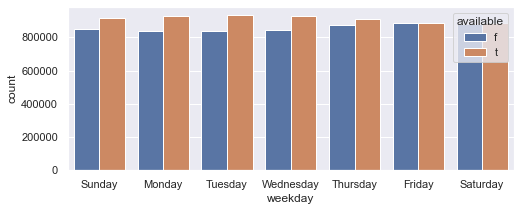

In [50]:
available_count=calendar_df[['available','count','weekday']].groupby(['weekday','available']).count().reset_index()
sns.barplot(data=available_count,x='weekday',y='count',hue='available',order=['Sunday','Monday','Tuesday','Wednesday',
                                                                     'Thursday','Friday','Saturday'])

# Reviews Exploration

In [4]:
#how have the reviewers comments changed over time (those that have reviewed more than once)
#how have the reviews changed for the listings over time?
#what are the amount of reviews in each month?
#what time frame do the reviews span?

#what would be considered a positive versus a negative review?---how can you tell?

In [5]:
reviews_df=pd.read_csv('reviews.csv')

In [6]:
list(reviews_df.columns)

['Unnamed: 0',
 'listing_id',
 'id',
 'date',
 'reviewer_id',
 'reviewer_name',
 'comments',
 'city',
 'state']

In [7]:
reviews_df.shape

(1772519, 9)

In [8]:
reviews_group=reviews_df.groupby('reviewer_id').count().reset_index()
reviews_group=reviews_group[reviews_group['listing_id']>1]
reviews_group.shape

#176,755 people left more than one review for airbnbs.

(176755, 9)

In [9]:
#how many reviews does each listing have?
#which listing has the most reviews, which has the least?
reviews_listing=reviews_df[['listing_id','comments']].groupby('listing_id').count().reset_index()
reviews_listing_sort = reviews_listing.sort_values(by = 'comments',ascending=False)
reviews_listing_sort
#there are 28,166 unique listing IDs within the dataframe

,listing_id,comments
9095,29819757,2843
151,329997,1225
10460,34122310,1167
20643,54227245,1144
8887,29093384,1139
...,...,...
9433,31084519,1
19337,52778055,1
9393,30937565,1
9385,30905012,1


# Listings Exploration

In [10]:
listings_df=pd.read_csv('listings.csv')

C:\Users\rache\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (29,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
listings_df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights

In [12]:
listings_df_trunc=listings_df[['price','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']].dropna()
listings_df_trunc['price'] = listings_df_trunc['price'].replace('\$|,', '', regex=True)
listings_df_trunc['price'] = pd.to_numeric(listings_df_trunc['price'])
listings_df_trunc

,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,63.0,4.86,4.83,4.96,4.94,4.75,4.78
1,96.0,4.88,4.85,4.89,4.82,4.74,4.79
3,41.0,4.90,4.86,4.91,4.94,4.75,4.92
4,286.0,4.87,4.74,4.98,4.97,4.91,4.78
5,109.0,4.99,4.99,4.99,4.98,4.87,4.93
...,...,...,...,...,...,...,...
34006,94.0,5.00,5.00,5.00,5.00,5.00,5.00
34007,315.0,5.00,5.00,5.00,5.00,5.00,5.00
34008,118.0,5.00,5.00,5.00,5.00,4.00,5.00
34013,50.0,5.00,5.00,5.00,5.00,5.00,4.50


### Comparing price to difference review ratings

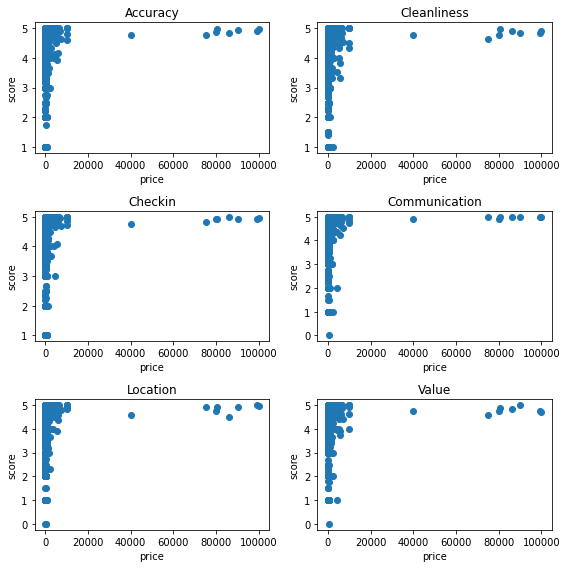

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2,figsize=(8,8))

ax[0, 0].scatter(data=listings_df_trunc,x='price',y='review_scores_accuracy')
ax[0,0].set_title('Accuracy')
ax[0, 1].scatter(data=listings_df_trunc,x='price',y='review_scores_cleanliness')
ax[0,1].set_title('Cleanliness')
ax[1, 0].scatter(data=listings_df_trunc,x='price',y='review_scores_checkin')
ax[1,0].set_title('Checkin')
ax[1, 1].scatter(data=listings_df_trunc,x='price',y='review_scores_communication')
ax[1,1].set_title('Communication')
ax[2, 0].scatter(data=listings_df_trunc,x='price',y='review_scores_location')
ax[2,0].set_title('Location')
ax[2, 1].scatter(data=listings_df_trunc,x='price',y='review_scores_value')
ax[2,1].set_title('Value')

for row in [0,1,2]:
    for col in [0,1]:
        ax[row,col].set_xlabel('price')
        ax[row,col].set_ylabel('score')

plt.tight_layout()
plt.show()

# Word Clouds

In [14]:
#create a word cloud for each of the cities - what do the descriptions say? what do the names say?
def create_word_cloud(new_df,column):
    '''take in a dataframe column and generate a word cloud'''
    stopwords=set(STOPWORDS)
    df=new_df.copy()
    
    df[column]=df[column].astype(str).apply(lambda x:x.lower())
    for value in ['<b>','</b>','<br>','<br/>','<br','/>','the space']:
        df[column]=df[column].str.replace(value,'')
    comment_words=" ".join(df[column])
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    return plt.show() 

### Airbnb Description

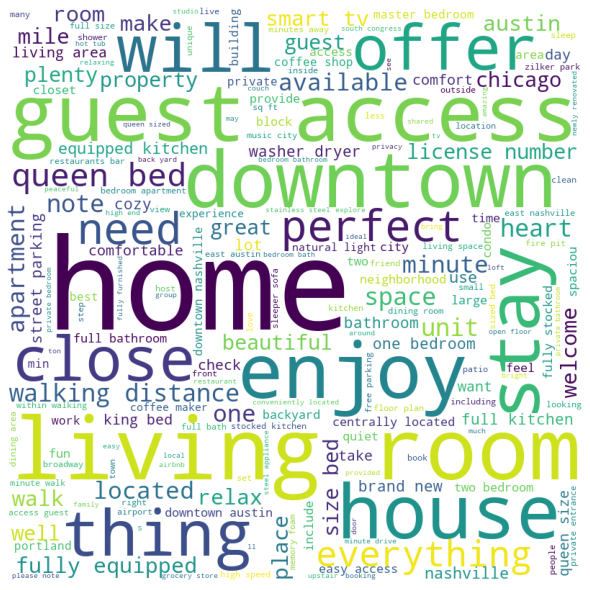

In [15]:
create_word_cloud(listings_df,'description')

### Airbnb Name

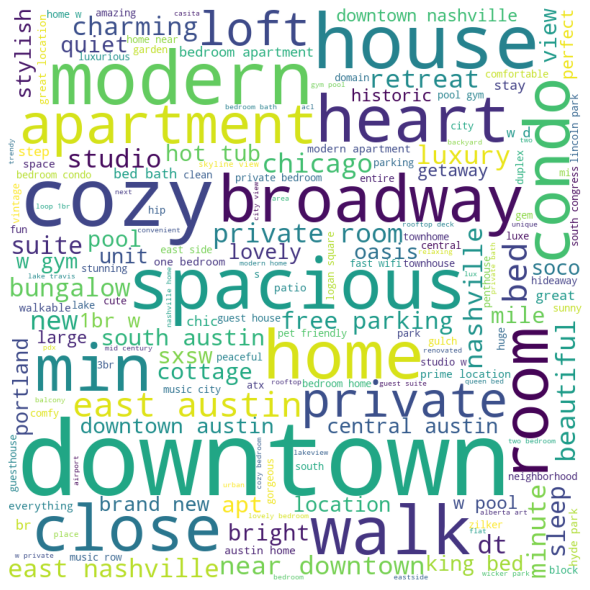

In [16]:
create_word_cloud(listings_df,'name')

### Neighborhood Overview

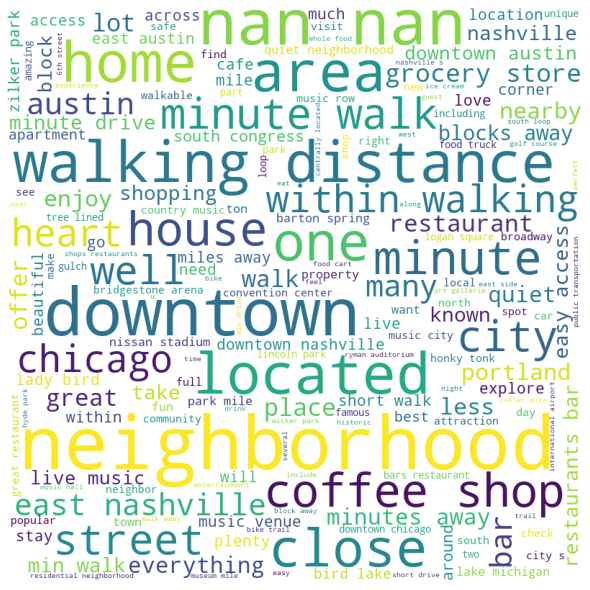

In [17]:
create_word_cloud(listings_df,'neighborhood_overview')

### Amenities

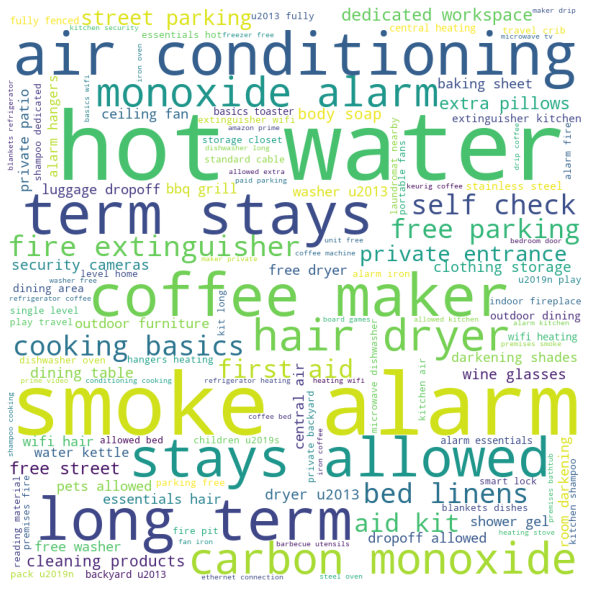

In [18]:
create_word_cloud(listings_df,'amenities')

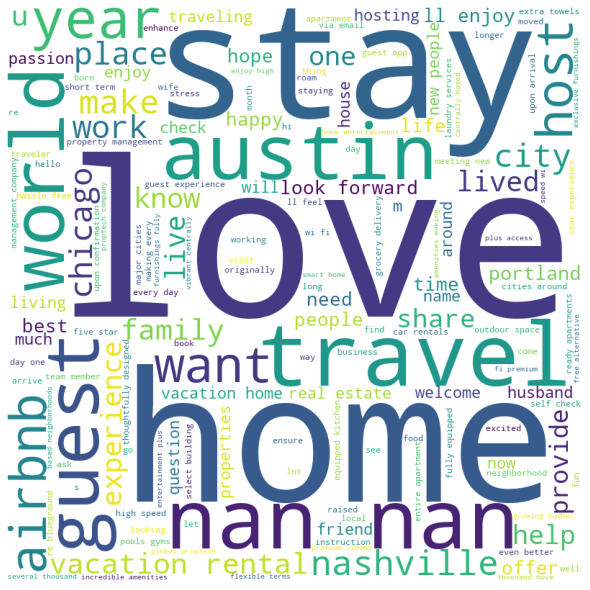

In [19]:
create_word_cloud(listings_df,'host_about')

### Reviews

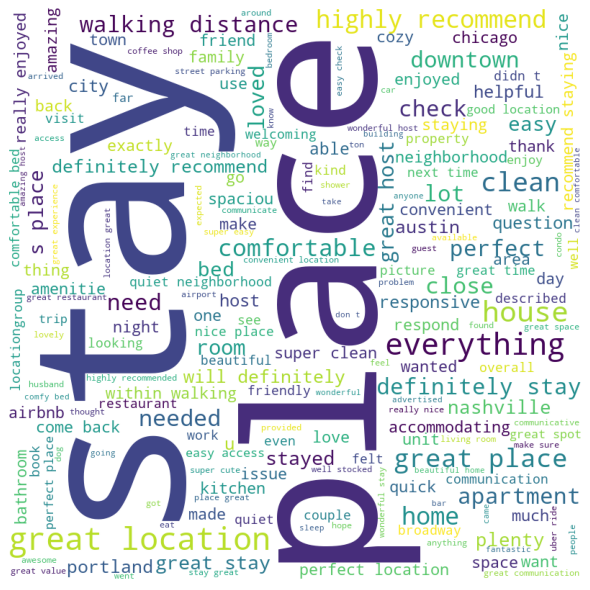

In [20]:
create_word_cloud(reviews_df,'comments')

In [21]:
#what type of people like to rent out their homes?
#what do people mark down for with an airbnb review?
#what do people look for with airbnbs? - what's valued more?
#What is most indicative of a higher listing price?
#what is most indicative of higher bookings?
#how do the reviews compare for the top ten most expensive rooms and the least expensive rooms?

In [28]:
listings_df.rename(columns = {'id':'listing_id'}, inplace = True)
reviews_and_listing=listings_df.merge(reviews_df,on='listing_id')
sorted_reviews_listing=reviews_and_listing.sort_values(by = 'price')
zero_price=sorted_reviews_listing[sorted_reviews_listing['price']=='$0.00']

Listings that are priced at zero dollars

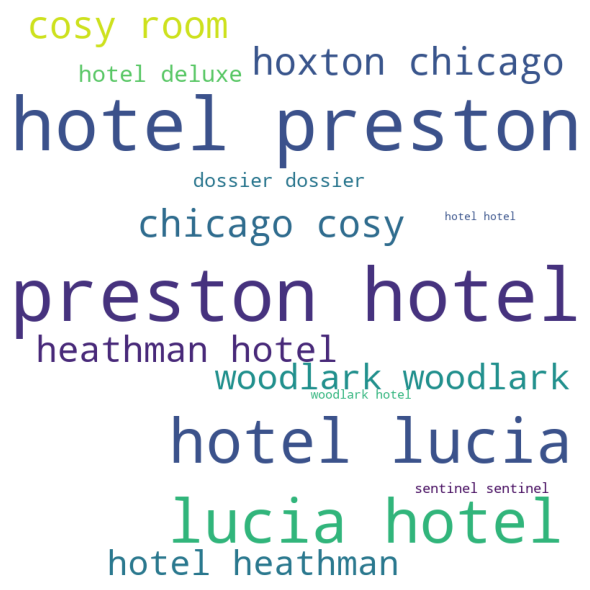

In [29]:
#bottom listing prices appear to be hotels
create_word_cloud(zero_price,'name')

Why would some of the airbnb's be listed as zero dollars?

In [30]:
sorted_reviews_listing['price']=sorted_reviews_listing['price'].replace('[\$,]','',regex=True).astype(float)

In [31]:
top_price=sorted_reviews_listing.nlargest(100,'price')
bottom_price=sorted_reviews_listing.nsmallest(100,'price')

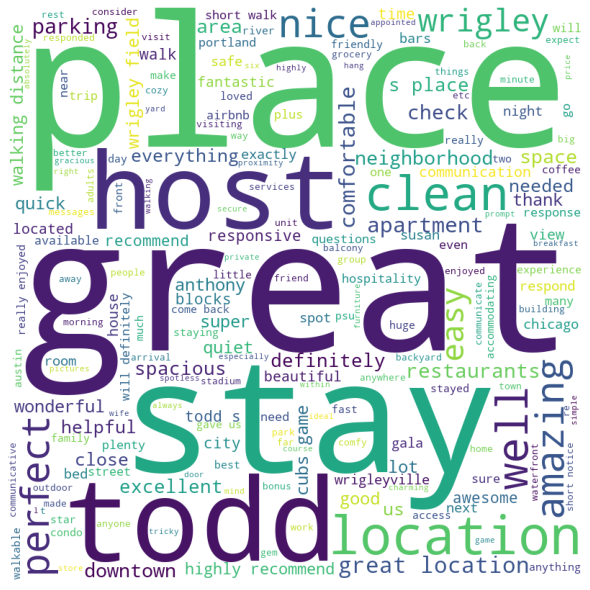

In [32]:
create_word_cloud(top_price,'comments')

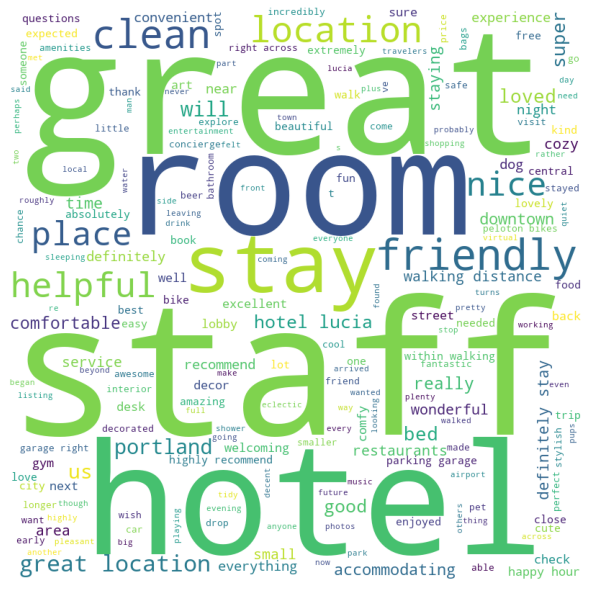

In [33]:
#bottom price appears to be hotels? why?
create_word_cloud(bottom_price,'comments')

In [ ]:
#host since compared to their communication score?
#overall scores for superhost compared to not superhost?

In [49]:
reviews_and_listing['host_len']=pd.Timestamp.now().normalize()-pd.to_datetime(reviews_and_listing['host_since'])

In [57]:
reviews_and_listing['host_len']=reviews_and_listing['host_len'].dt.days

In [35]:
list(reviews_and_listing.columns)

['Unnamed: 0_x',
 'listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availab

Text(0.5, 1.0, 'Review Scores vs. Days Being a Host')

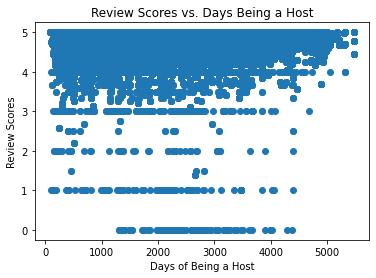

In [60]:
plt.scatter(data=reviews_and_listing,x='host_len',y='review_scores_rating')
plt.xlabel('Days of Being a Host')
plt.ylabel('Review Scores')
plt.title('Review Scores vs. Days Being a Host')

In [74]:
super_df=reviews_and_listing[['host_is_superhost','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                     'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
super_df=super_df.groupby('host_is_superhost').mean().reset_index()
super_df=pd.melt(super_df, id_vars=['host_is_superhost'], value_vars=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                     'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])
is_super=super_df[super_df['host_is_superhost']=='f']
not_super=super_df[super_df['host_is_superhost']=='t']

In [75]:
plt.bar(data=is_super,x='variable',y='value')

TypeError: bar() missing 1 required positional argument: 'height'

# Neighborhoods Exploration

In [53]:
neigh_df=pd.read_csv('neighbourhoods.csv')